In [1]:
# v0.3 - in progress

import numpy as np

from scipy.signal import convolve2d
from scipy.sparse import coo_matrix

from pyinterpolate.variogram import build_experimental_variogram
from pyinterpolate.variogram.theoretical.models import *

import matplotlib.pyplot as plt

In [2]:
# Create artificial surface

def generate_logistic_map(r: float, size: int, initial_ratio: float) -> np.array:
    # rxn(1-xn)
    vals = [initial_ratio]
    for _ in range(size-1):
        new_val = r * vals[-1] * (1 - vals[-1])
        vals.append(new_val)
    return np.array(vals)

In [3]:
values = generate_logistic_map(3.9, 10000, 0.33)

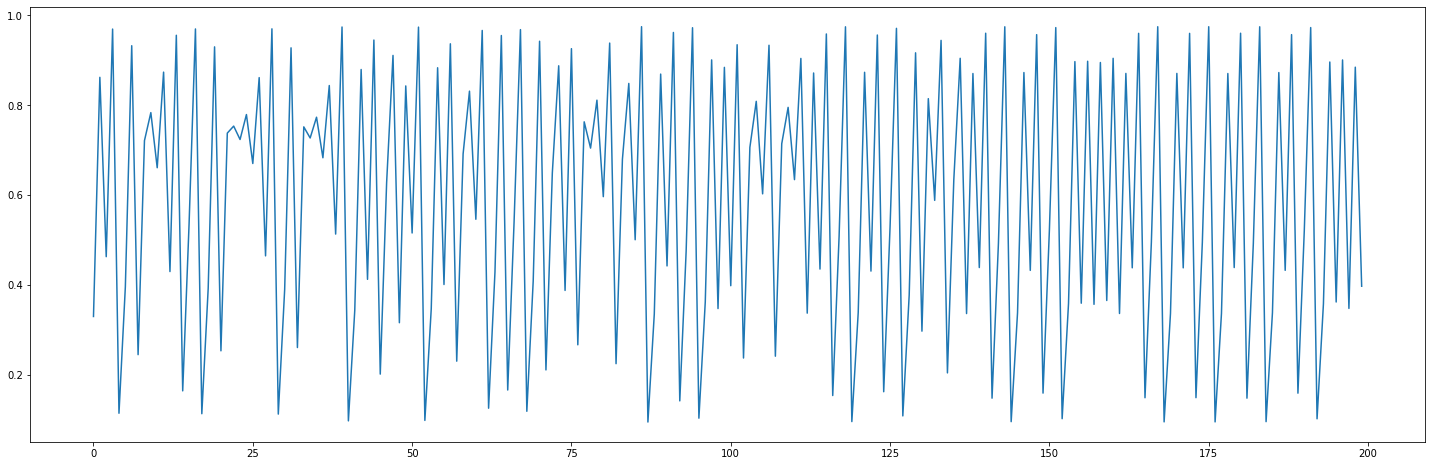

In [4]:
plt.figure(figsize=(25, 8))
plt.plot(values[0:200])
plt.show()

In [5]:
# Create surface from array

surface = np.reshape(values, (100, 100))

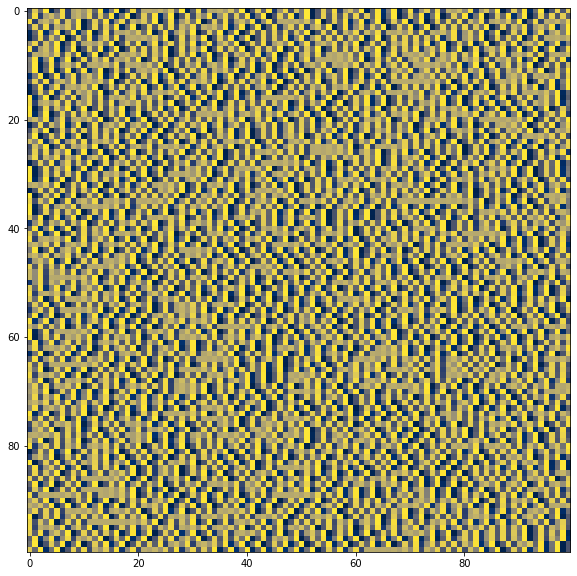

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(surface, cmap='cividis')
plt.show()

In [7]:
# Slightly blur image with simple mean filter

mean_filter = np.ones(shape=(7, 7))

surf_blurred = convolve2d(surface, mean_filter, boundary='wrap')

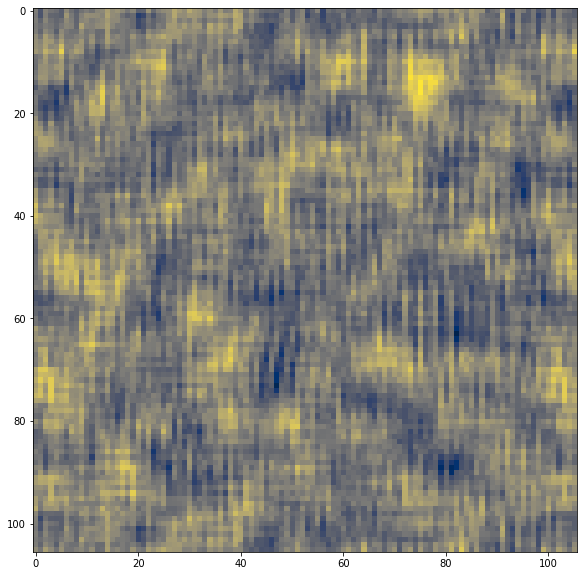

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(surf_blurred, cmap='cividis')
plt.show()

In [9]:
# Transform data into x, y, val array

In [10]:
sparse_data = coo_matrix(surf_blurred)

In [11]:
# data, col, row == value, x, y

In [12]:
xyval = np.asarray([sparse_data.col, sparse_data.row, sparse_data.data]).T

In [13]:
# Get experimental variogram

In [14]:
experimental = build_experimental_variogram(xyval, 2, 20)

In [15]:
semivars = experimental.experimental_semivariance_array.copy()

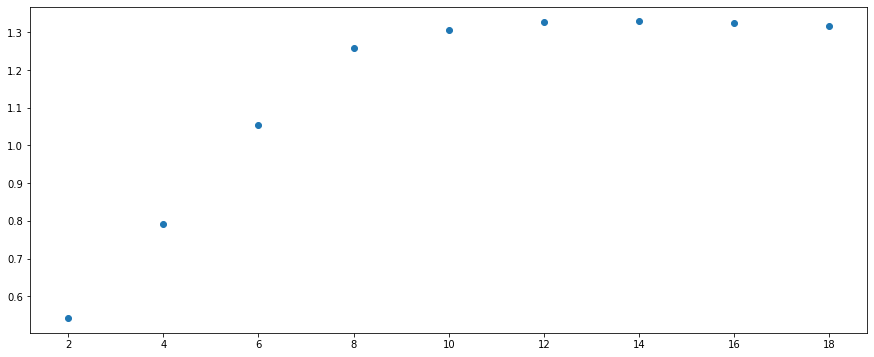

In [16]:
plt.figure(figsize=(15, 6))
plt.scatter(semivars[:, 0], semivars[:, 1])
plt.show()

In [17]:
# Set nugget, sill and range

In [18]:
_nugget = 0
_sill = 1.3
_range = 7
_lags = semivars[:, 0].copy()

In [19]:
# Crete different models: circular, cubic, exponential, gaussian, linear, power, spherical

In [20]:
circular = circular_model(lags=_lags,
                          nugget=_nugget,
                          sill=_sill,
                          rang=_range)

cubic = cubic_model(lags=_lags,
                    nugget=_nugget,
                    sill=_sill,
                    rang=_range)

exponential = exponential_model(lags=_lags,
                                nugget=_nugget,
                                sill=_sill,
                                rang=_range)

gaussian = gaussian_model(lags=_lags,
                          nugget=_nugget,
                          sill=_sill,
                          rang=_range)

linear = linear_model(lags=_lags,
                      nugget=_nugget,
                      sill=_sill,
                      rang=_range)

power = power_model(lags=_lags,
                    nugget=_nugget,
                    sill=_sill,
                    rang=_range)

spherical = spherical_model(lags=_lags,
                            nugget=_nugget,
                            sill=_sill,
                            rang=_range)

/Users/szymonos/Documents/GitHub/pyinterpolate/pyinterpolate/variogram/theoretical/models/variogram_models.py:75: RuntimeWarning: invalid value encountered in arccos
  (nugget + sill*(1 - (pic * np.arccos(ar)) + (pic * ar) * np.sqrt(1 - ar**2))),
/Users/szymonos/Documents/GitHub/pyinterpolate/pyinterpolate/variogram/theoretical/models/variogram_models.py:75: RuntimeWarning: invalid value encountered in sqrt
  (nugget + sill*(1 - (pic * np.arccos(ar)) + (pic * ar) * np.sqrt(1 - ar**2))),


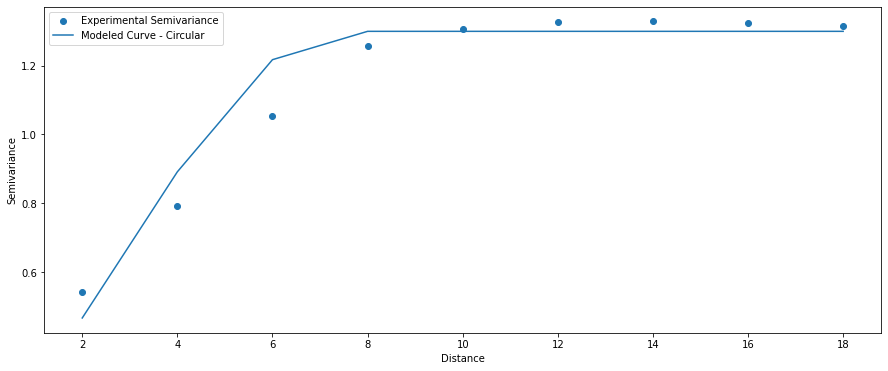

In [21]:
# Plot circular

plt.figure(figsize=(15, 6))
plt.scatter(_lags, semivars[:, 1])
plt.plot(_lags, circular)
plt.legend(['Experimental Semivariance', 'Modeled Curve - Circular'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

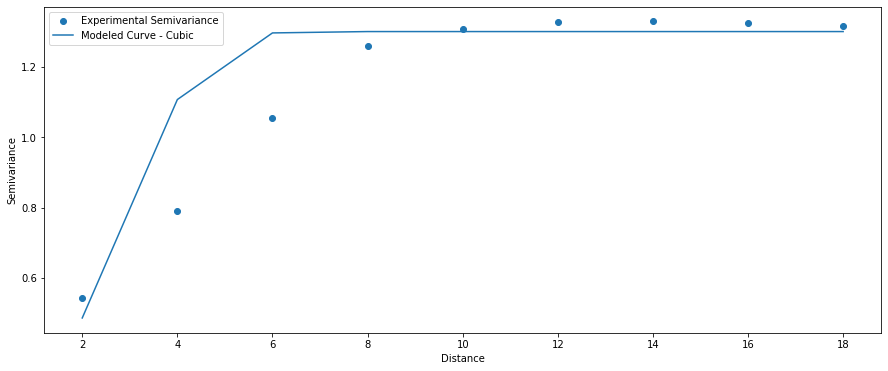

In [22]:
# Plot cubic

plt.figure(figsize=(15, 6))
plt.scatter(_lags, semivars[:, 1])
plt.plot(_lags, cubic)
plt.legend(['Experimental Semivariance', 'Modeled Curve - Cubic'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

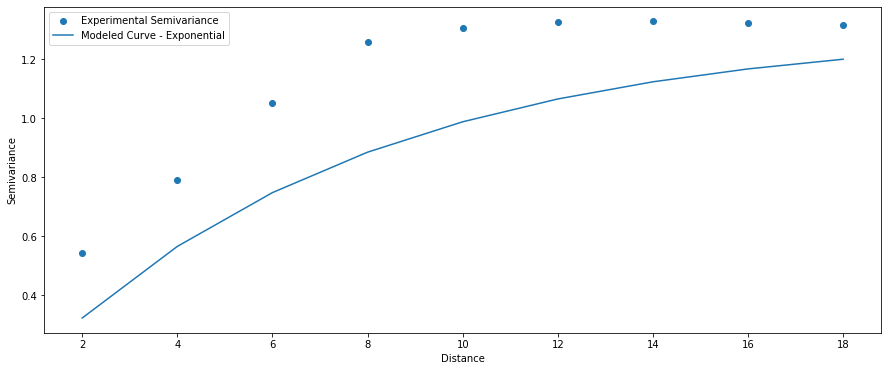

In [23]:
# Plot exponential

plt.figure(figsize=(15, 6))
plt.scatter(_lags, semivars[:, 1])
plt.plot(_lags, exponential)
plt.legend(['Experimental Semivariance', 'Modeled Curve - Exponential'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

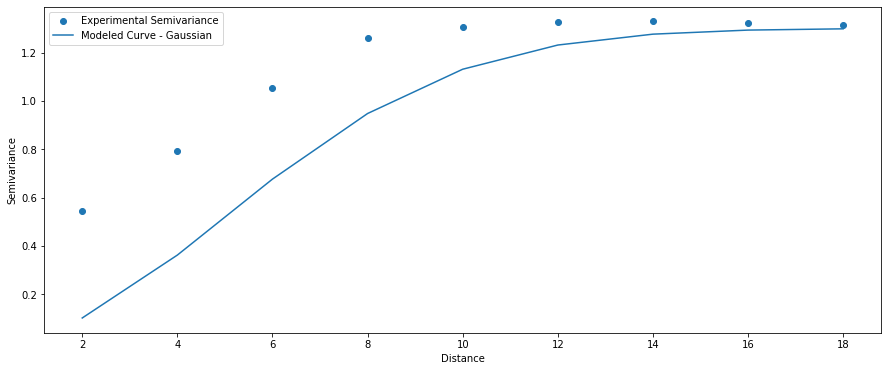

In [24]:
# Plot gaussian

plt.figure(figsize=(15, 6))
plt.scatter(_lags, semivars[:, 1])
plt.plot(_lags, gaussian)
plt.legend(['Experimental Semivariance', 'Modeled Curve - Gaussian'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

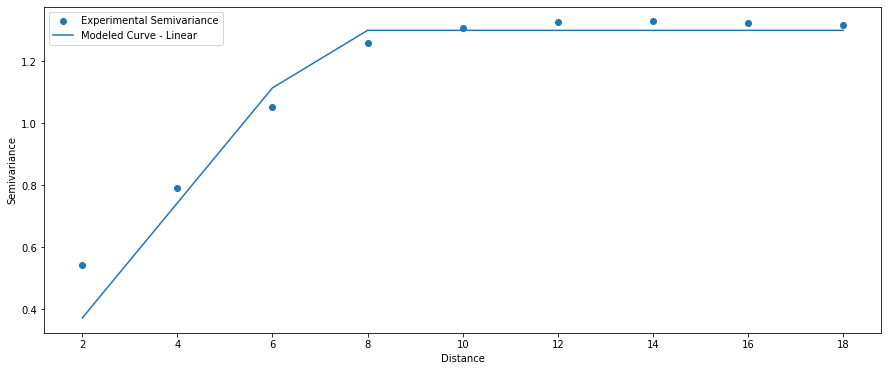

In [25]:
# Plot linear

plt.figure(figsize=(15, 6))
plt.scatter(_lags, semivars[:, 1])
plt.plot(_lags, linear)
plt.legend(['Experimental Semivariance', 'Modeled Curve - Linear'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

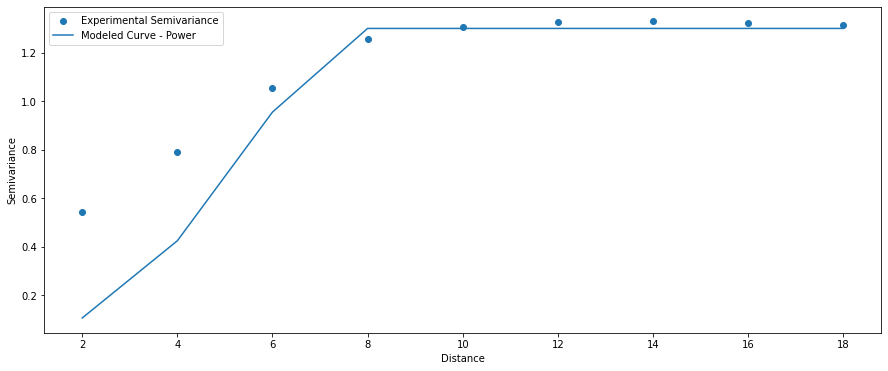

In [26]:
# Plot power

plt.figure(figsize=(15, 6))
plt.scatter(_lags, semivars[:, 1])
plt.plot(_lags, power)
plt.legend(['Experimental Semivariance', 'Modeled Curve - Power'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

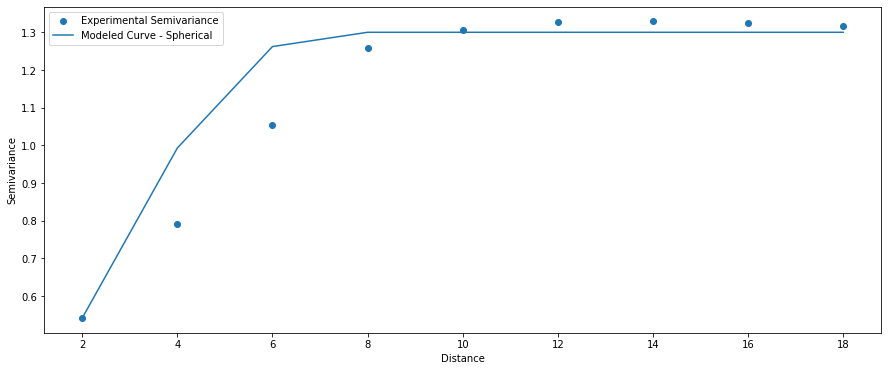

In [27]:
# Plot spherical

plt.figure(figsize=(15, 6))
plt.scatter(_lags, semivars[:, 1])
plt.plot(_lags, spherical)
plt.legend(['Experimental Semivariance', 'Modeled Curve - Spherical'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

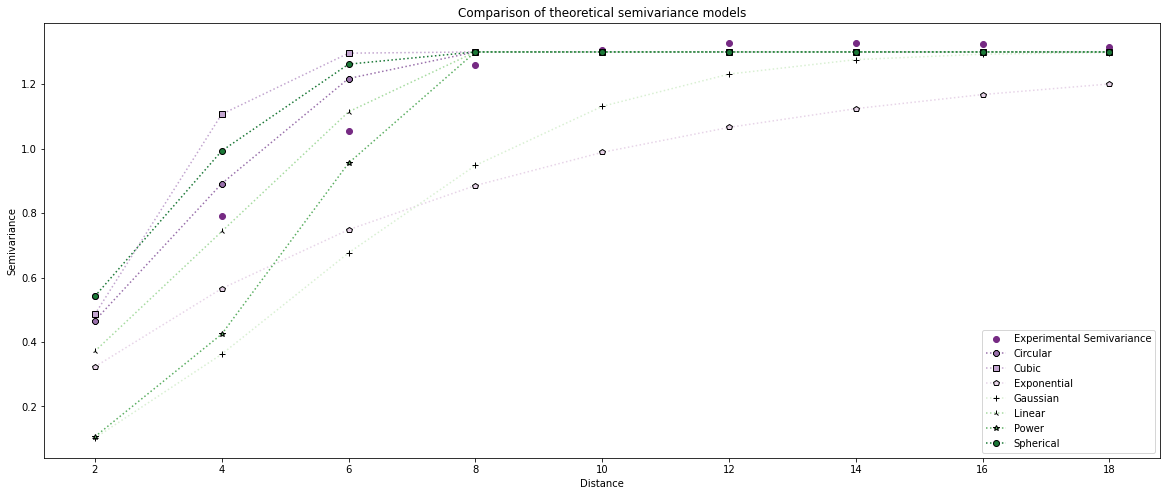

In [28]:
# Plot ALL models

plt.figure(figsize=(20, 8))
plt.scatter(_lags, semivars[:, 1], color='#762a83')
plt.plot(_lags, circular, ':8', color='#9970ab', mec='black')
plt.plot(_lags, cubic, ':s', color='#c2a5cf', mec='black')
plt.plot(_lags, exponential, ':p', color='#e7d4e8', mec='black')
plt.plot(_lags, gaussian, ':+', color='#d9f0d3', mec='black')
plt.plot(_lags, linear, ':2', color='#a6dba0', mec='black')
plt.plot(_lags, power, ':*', color='#5aae61', mec='black')
plt.plot(_lags, spherical, ':o', color='#1b7837', mec='black')
plt.title('Comparison of theoretical semivariance models')
plt.legend(['Experimental Semivariance',
            'Circular',
            'Cubic',
            'Exponential',
            'Gaussian',
            'Linear',
            'Power',
            'Spherical'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()